# Data Profiling - LMA Features Data

## Imports

In [151]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data from META file [DON'T RUN]

In [152]:
meta_file = "lma_features/FILES_META.txt"

lma_features = []

with open(meta_file, 'r') as r:
    for file in r.readlines():
        file = file.replace("\n","")
        
        with open(file, 'r') as f:
            for line in f:
                lma_features.append(ast.literal_eval(line)) #ast.literal_eval converts dict string into dict

## Convert to CSV [DON'T RUN]

In [153]:
header = ["avg_hand_distance", "avg_l_hand_hip_distance",
          "avg_r_hand_hip_distance", "avg_feet_distance",
          "avg_l_hand_chest_distance", "avg_r_hand_chest_distance",
          "avg_l_elbow_hip_distance", "avg_r_elbow_hip_distance",
          "avg_chest_pelvis_distance", "avg_neck_chest_distance",
          "avg_neck_rotation_w", "avg_neck_rotation_x","avg_neck_rotation_y", "avg_neck_rotation_z", 
          "avg_pelvis_rotation_w", "avg_pelvis_rotation_x", "avg_pelvis_rotation_y", "avg_pelvis_rotation_z",
          "std_l_hand_position", "std_r_hand_position",
          "avg_l_forearm_velocity", "avg_r_forearm_velocity",
          "avg_pelvis_velocity_x", "avg_pelvis_velocity_y", "avg_pelvis_velocity_z", 
          "avg_l_foot_velocity_x", "avg_l_foot_velocity_y", "avg_l_foot_velocity_z",
          "avg_r_foot_velocity_x", "avg_r_foot_velocity_y", "avg_r_foot_velocity_z", 
          "avg_upper_body_volume",
          "avg_total_body_volume", "avg_distance_traveled",
          "EMOTION"
         ]

with open('lma_features/LMA_DATA.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(header)

    for entry in lma_features:
        row = []
        for feature in entry["lma_features"]:
            if(type(feature) is tuple):
                for i in feature:
                    row.append(i)
            else:
                row.append(feature)
                
        emotion = entry["label"]
        if emotion == "scared":
            emotion = "afraid"
            
        writer.writerow(row + [emotion])

## Load Data from CSV

In [154]:
data = pd.read_csv('lma_features/LMA_DATA.csv')

In [155]:
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION
0,0.440457,0.268696,0.232545,0.262020,0.469732,0.453368,0.351519,0.334725,0.286151,0.278746,...,-0.001553,-0.004276,-0.003432,-0.001553,-0.004276,-0.003432,0.028602,0.223692,0.000175,angry
1,0.436696,0.266929,0.231202,0.270096,0.468911,0.452745,0.350940,0.334144,0.286151,0.278748,...,-0.001765,-0.001323,-0.012256,-0.001765,-0.001323,-0.012256,0.028540,0.223304,0.000057,angry
2,0.429922,0.264091,0.228568,0.278028,0.467631,0.451541,0.350120,0.333041,0.286151,0.278751,...,-0.000829,0.010741,-0.015035,-0.000829,0.010741,-0.015035,0.028424,0.222493,0.000173,angry
3,0.420335,0.262567,0.222643,0.286988,0.467149,0.448736,0.349962,0.330507,0.286151,0.278767,...,-0.034921,0.002394,-0.002680,-0.034921,0.002394,-0.002680,0.028234,0.220828,0.000941,angry
4,0.404506,0.261934,0.217203,0.295619,0.450226,0.435649,0.340933,0.322575,0.286151,0.278727,...,0.013267,-0.134403,0.026550,0.013267,-0.134403,0.026550,0.028782,0.224766,0.002854,angry


## Data Analysis

### Data Shape

In [156]:
no_entries = data.shape[0]
no_variables = data.shape[1]

no_variables = no_variables - 1 # Remove the target variable to get the ratio

entries2variables_ration = no_entries/no_variables

print('No. entries:', no_entries, '\nNo. Features:', no_variables)
print('Entries to Feature Ratio:', entries2variables_ration)

No. entries: 43039 
No. Features: 34
Entries to Feature Ratio: 1265.8529411764705


### Variable Types

In [157]:
print("Feature Types:\n" + str(data.dtypes))

Feature Types:
avg_hand_distance            float64
avg_l_hand_hip_distance      float64
avg_r_hand_hip_distance      float64
avg_feet_distance            float64
avg_l_hand_chest_distance    float64
avg_r_hand_chest_distance    float64
avg_l_elbow_hip_distance     float64
avg_r_elbow_hip_distance     float64
avg_chest_pelvis_distance    float64
avg_neck_chest_distance      float64
avg_neck_rotation_w          float64
avg_neck_rotation_x          float64
avg_neck_rotation_y          float64
avg_neck_rotation_z          float64
avg_pelvis_rotation_w        float64
avg_pelvis_rotation_x        float64
avg_pelvis_rotation_y        float64
avg_pelvis_rotation_z        float64
std_l_hand_position          float64
std_r_hand_position          float64
avg_l_forearm_velocity       float64
avg_r_forearm_velocity       float64
avg_pelvis_velocity_x        float64
avg_pelvis_velocity_y        float64
avg_pelvis_velocity_z        float64
avg_l_foot_velocity_x        float64
avg_l_foot_velocity_y  

sad          8406
happy        7876
angry        7296
afraid       7209
disgusted    6491
neutral      4237
tired         654
excited       460
pleased       184
bored         142
relaxed        84
Name: EMOTION, dtype: int64


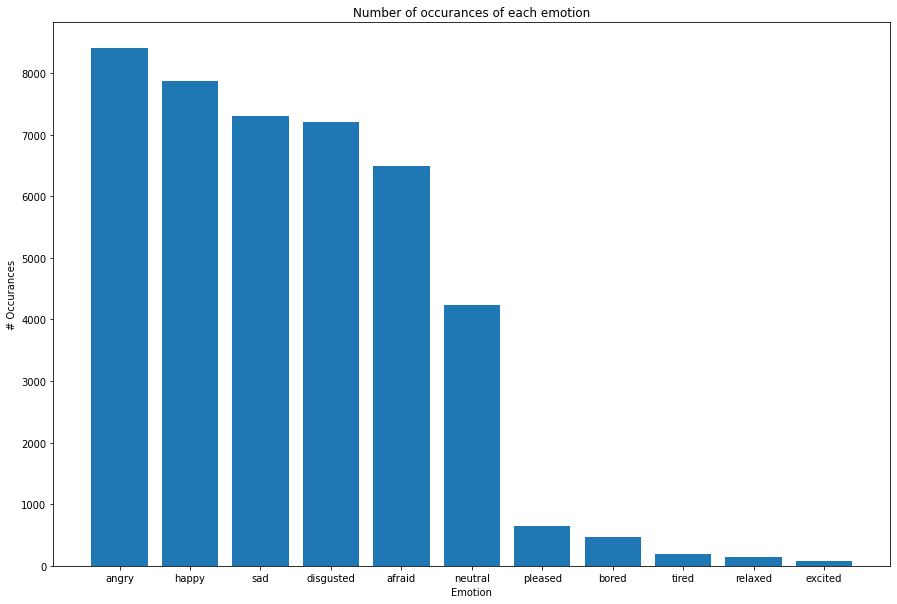

In [158]:
print(data['EMOTION'].value_counts())

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(data['EMOTION'].unique(), data['EMOTION'].value_counts())
ax.set(xlabel='Emotion', ylabel='# Occurances',
       title='Number of occurances of each emotion')

plt.show()

### Granularity

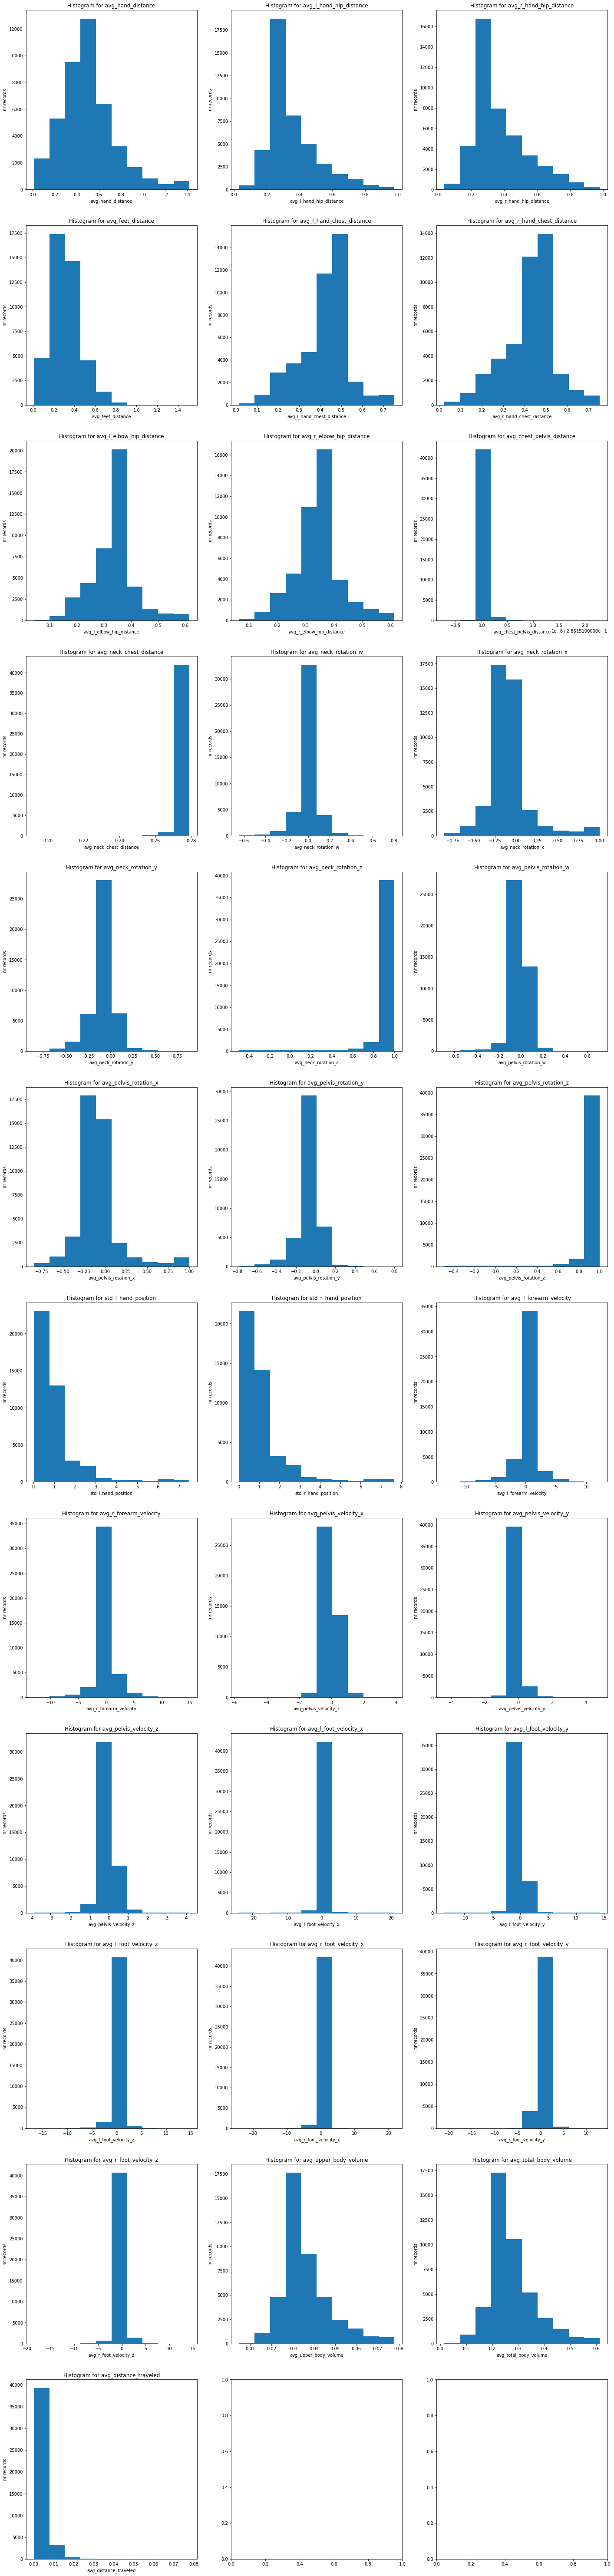

In [159]:
variables = data.select_dtypes(include='number').columns
rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%variables[n])
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[variables[n]].values)

    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    
plt.show()

### Correlation Analysis

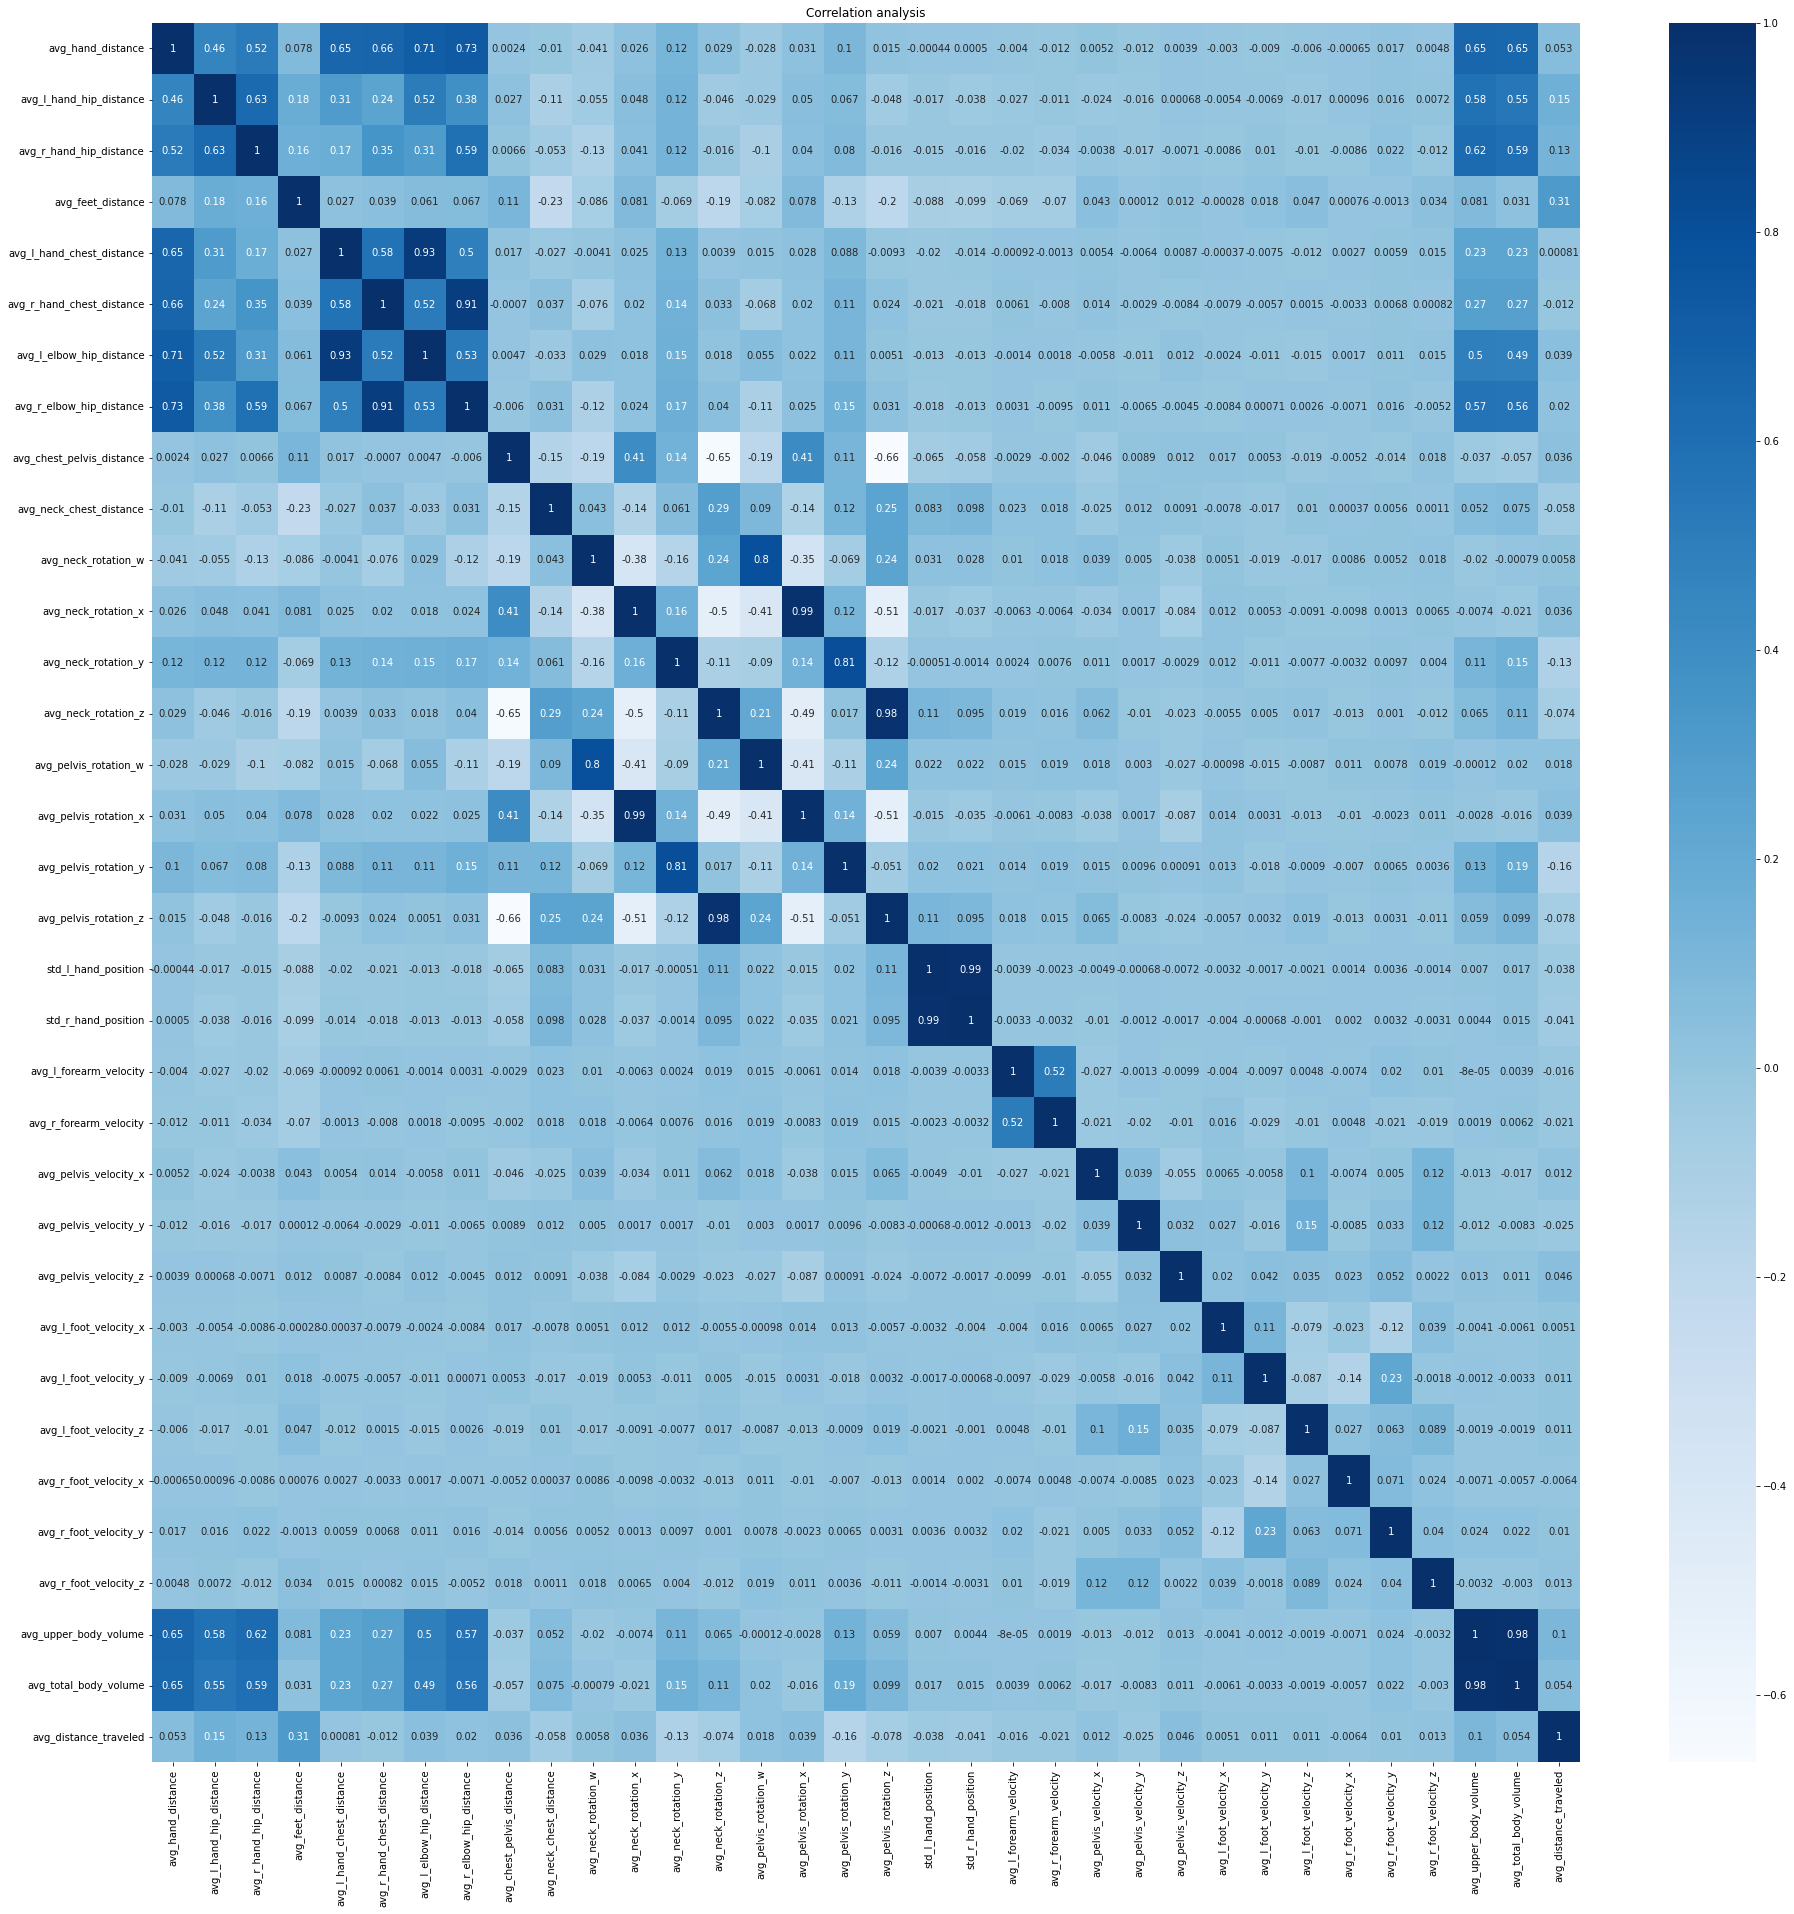

In [161]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [162]:
df = pd.DataFrame(data)
df['EMOTION'] =df['EMOTION'].astype('category').cat.codes

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION"])
print(cor_target)

avg_hand_distance            0.026419
avg_l_hand_hip_distance      0.001941
avg_r_hand_hip_distance      0.008412
avg_feet_distance            0.171734
avg_l_hand_chest_distance    0.007992
avg_r_hand_chest_distance    0.010267
avg_l_elbow_hip_distance     0.019425
avg_r_elbow_hip_distance     0.040736
avg_chest_pelvis_distance    0.011596
avg_neck_chest_distance      0.113091
avg_neck_rotation_w          0.012122
avg_neck_rotation_x          0.030891
avg_neck_rotation_y          0.034597
avg_neck_rotation_z          0.012744
avg_pelvis_rotation_w        0.021390
avg_pelvis_rotation_x        0.021374
avg_pelvis_rotation_y        0.067972
avg_pelvis_rotation_z        0.005093
std_l_hand_position          0.033570
std_r_hand_position          0.023087
avg_l_forearm_velocity       0.004693
avg_r_forearm_velocity       0.003799
avg_pelvis_velocity_x        0.021270
avg_pelvis_velocity_y        0.000314
avg_pelvis_velocity_z        0.003588
avg_l_foot_velocity_x        0.000673
avg_l_foot_v

# Data Profiling - Balanced Dataset

## Load Data from CSV

In [163]:
data = pd.read_csv('datasets/LMA_BALANCED.csv')

In [164]:
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION
0,1.392683,0.805132,0.805799,0.247039,0.715836,0.711517,0.580229,0.576592,0.286151,0.278743,...,-0.000026,0.000041,-0.000057,0.001189,-0.001889,0.008895,0.075937,0.594780,0.000056,afraid
1,1.392582,0.805015,0.806042,0.247571,0.715748,0.711626,0.580145,0.576692,0.286151,0.278760,...,-0.000032,0.000248,-0.000159,-0.011326,-0.004895,0.007414,0.075936,0.594673,0.000045,afraid
2,1.362031,0.750852,0.778974,0.387326,0.688703,0.704486,0.555093,0.571555,0.286151,0.278589,...,0.000922,-0.006888,0.003649,0.003275,-0.004558,0.006148,0.074220,0.579994,0.000032,afraid
3,1.391446,0.802226,0.804887,0.247502,0.714625,0.711143,0.579126,0.576251,0.286151,0.278767,...,-0.001768,-0.002076,0.004183,-0.000652,0.008581,0.011896,0.075866,0.594068,0.000032,afraid
4,1.362367,0.750761,0.779676,0.387258,0.688950,0.704559,0.555333,0.571585,0.286151,0.278516,...,0.001755,-0.013165,-0.001309,0.014053,-0.015203,0.001176,0.074223,0.580096,0.000051,afraid


## Data Analysis

### Data Shape

In [165]:
no_entries = data.shape[0]
no_variables = data.shape[1]

no_variables = no_variables - 1 # Remove the target variable to get the ratio

entries2variables_ration = no_entries/no_variables

print('No. entries:', no_entries, '\nNo. Features:', no_variables)
print('Entries to Feature Ratio:', entries2variables_ration)

No. entries: 22000 
No. Features: 34
Entries to Feature Ratio: 647.0588235294117


### Variable Types

In [166]:
print("Feature Types:\n" + str(data.dtypes))

Feature Types:
avg_hand_distance            float64
avg_l_hand_hip_distance      float64
avg_r_hand_hip_distance      float64
avg_feet_distance            float64
avg_l_hand_chest_distance    float64
avg_r_hand_chest_distance    float64
avg_l_elbow_hip_distance     float64
avg_r_elbow_hip_distance     float64
avg_chest_pelvis_distance    float64
avg_neck_chest_distance      float64
avg_neck_rotation_w          float64
avg_neck_rotation_x          float64
avg_neck_rotation_y          float64
avg_neck_rotation_z          float64
avg_pelvis_rotation_w        float64
avg_pelvis_rotation_x        float64
avg_pelvis_rotation_y        float64
avg_pelvis_rotation_z        float64
std_l_hand_position          float64
std_r_hand_position          float64
avg_l_forearm_velocity       float64
avg_r_forearm_velocity       float64
avg_pelvis_velocity_x        float64
avg_pelvis_velocity_y        float64
avg_pelvis_velocity_z        float64
avg_l_foot_velocity_x        float64
avg_l_foot_velocity_y  

afraid       2000
angry        2000
bored        2000
disgusted    2000
excited      2000
happy        2000
neutral      2000
pleased      2000
relaxed      2000
sad          2000
tired        2000
Name: EMOTION, dtype: int64


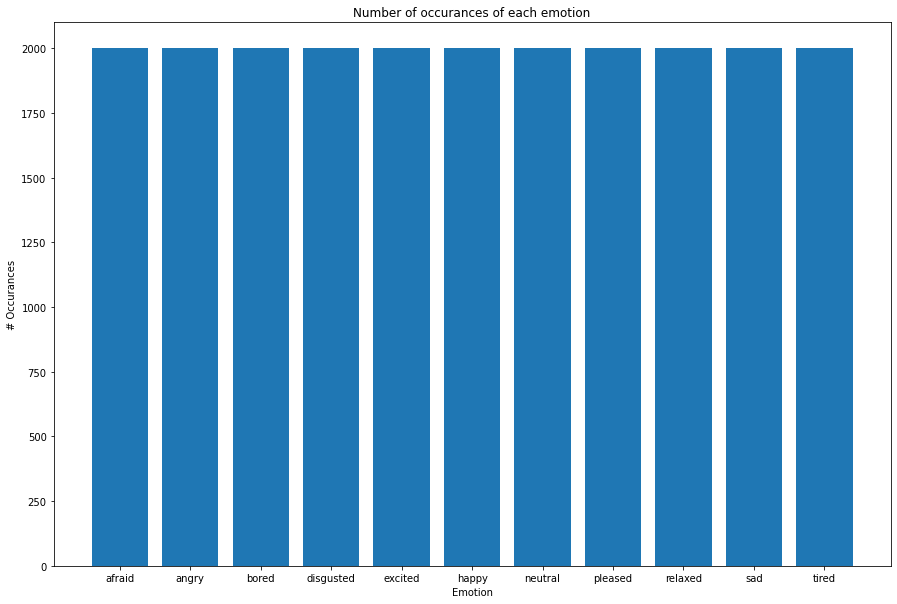

In [167]:
print(data['EMOTION'].value_counts())

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(data['EMOTION'].unique(), data['EMOTION'].value_counts())
ax.set(xlabel='Emotion', ylabel='# Occurances',
       title='Number of occurances of each emotion')

plt.show()

### Granularity

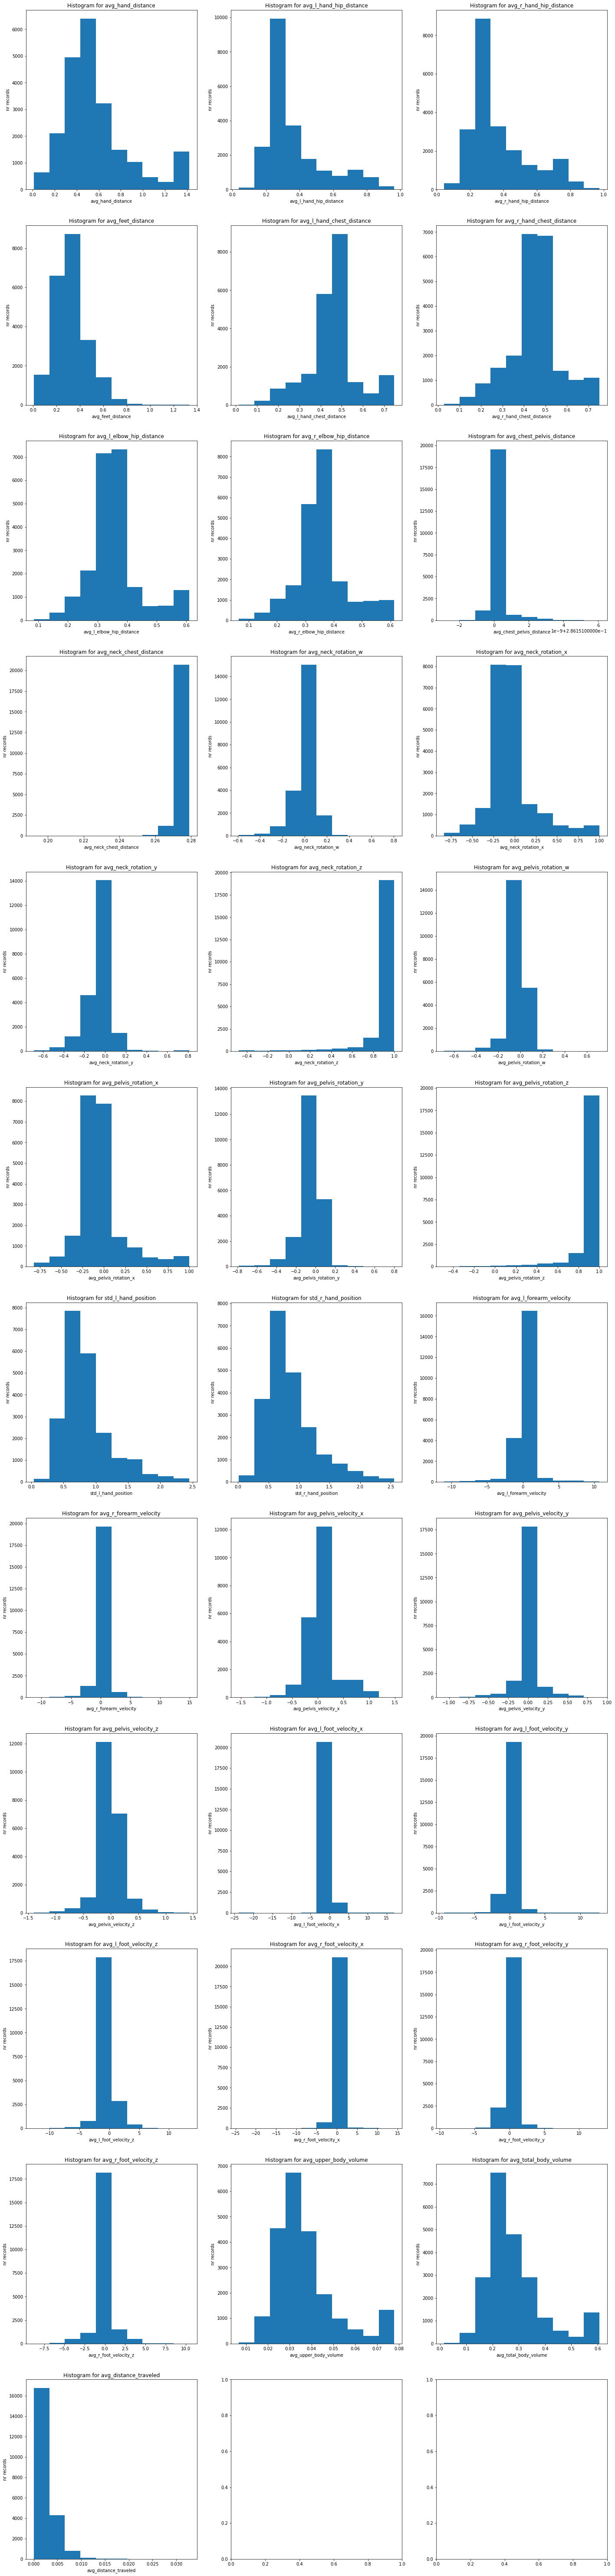

In [168]:
variables = data.select_dtypes(include='number').columns
rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%variables[n])
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[variables[n]].values)

    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    
plt.show()

### Correlation Analysis

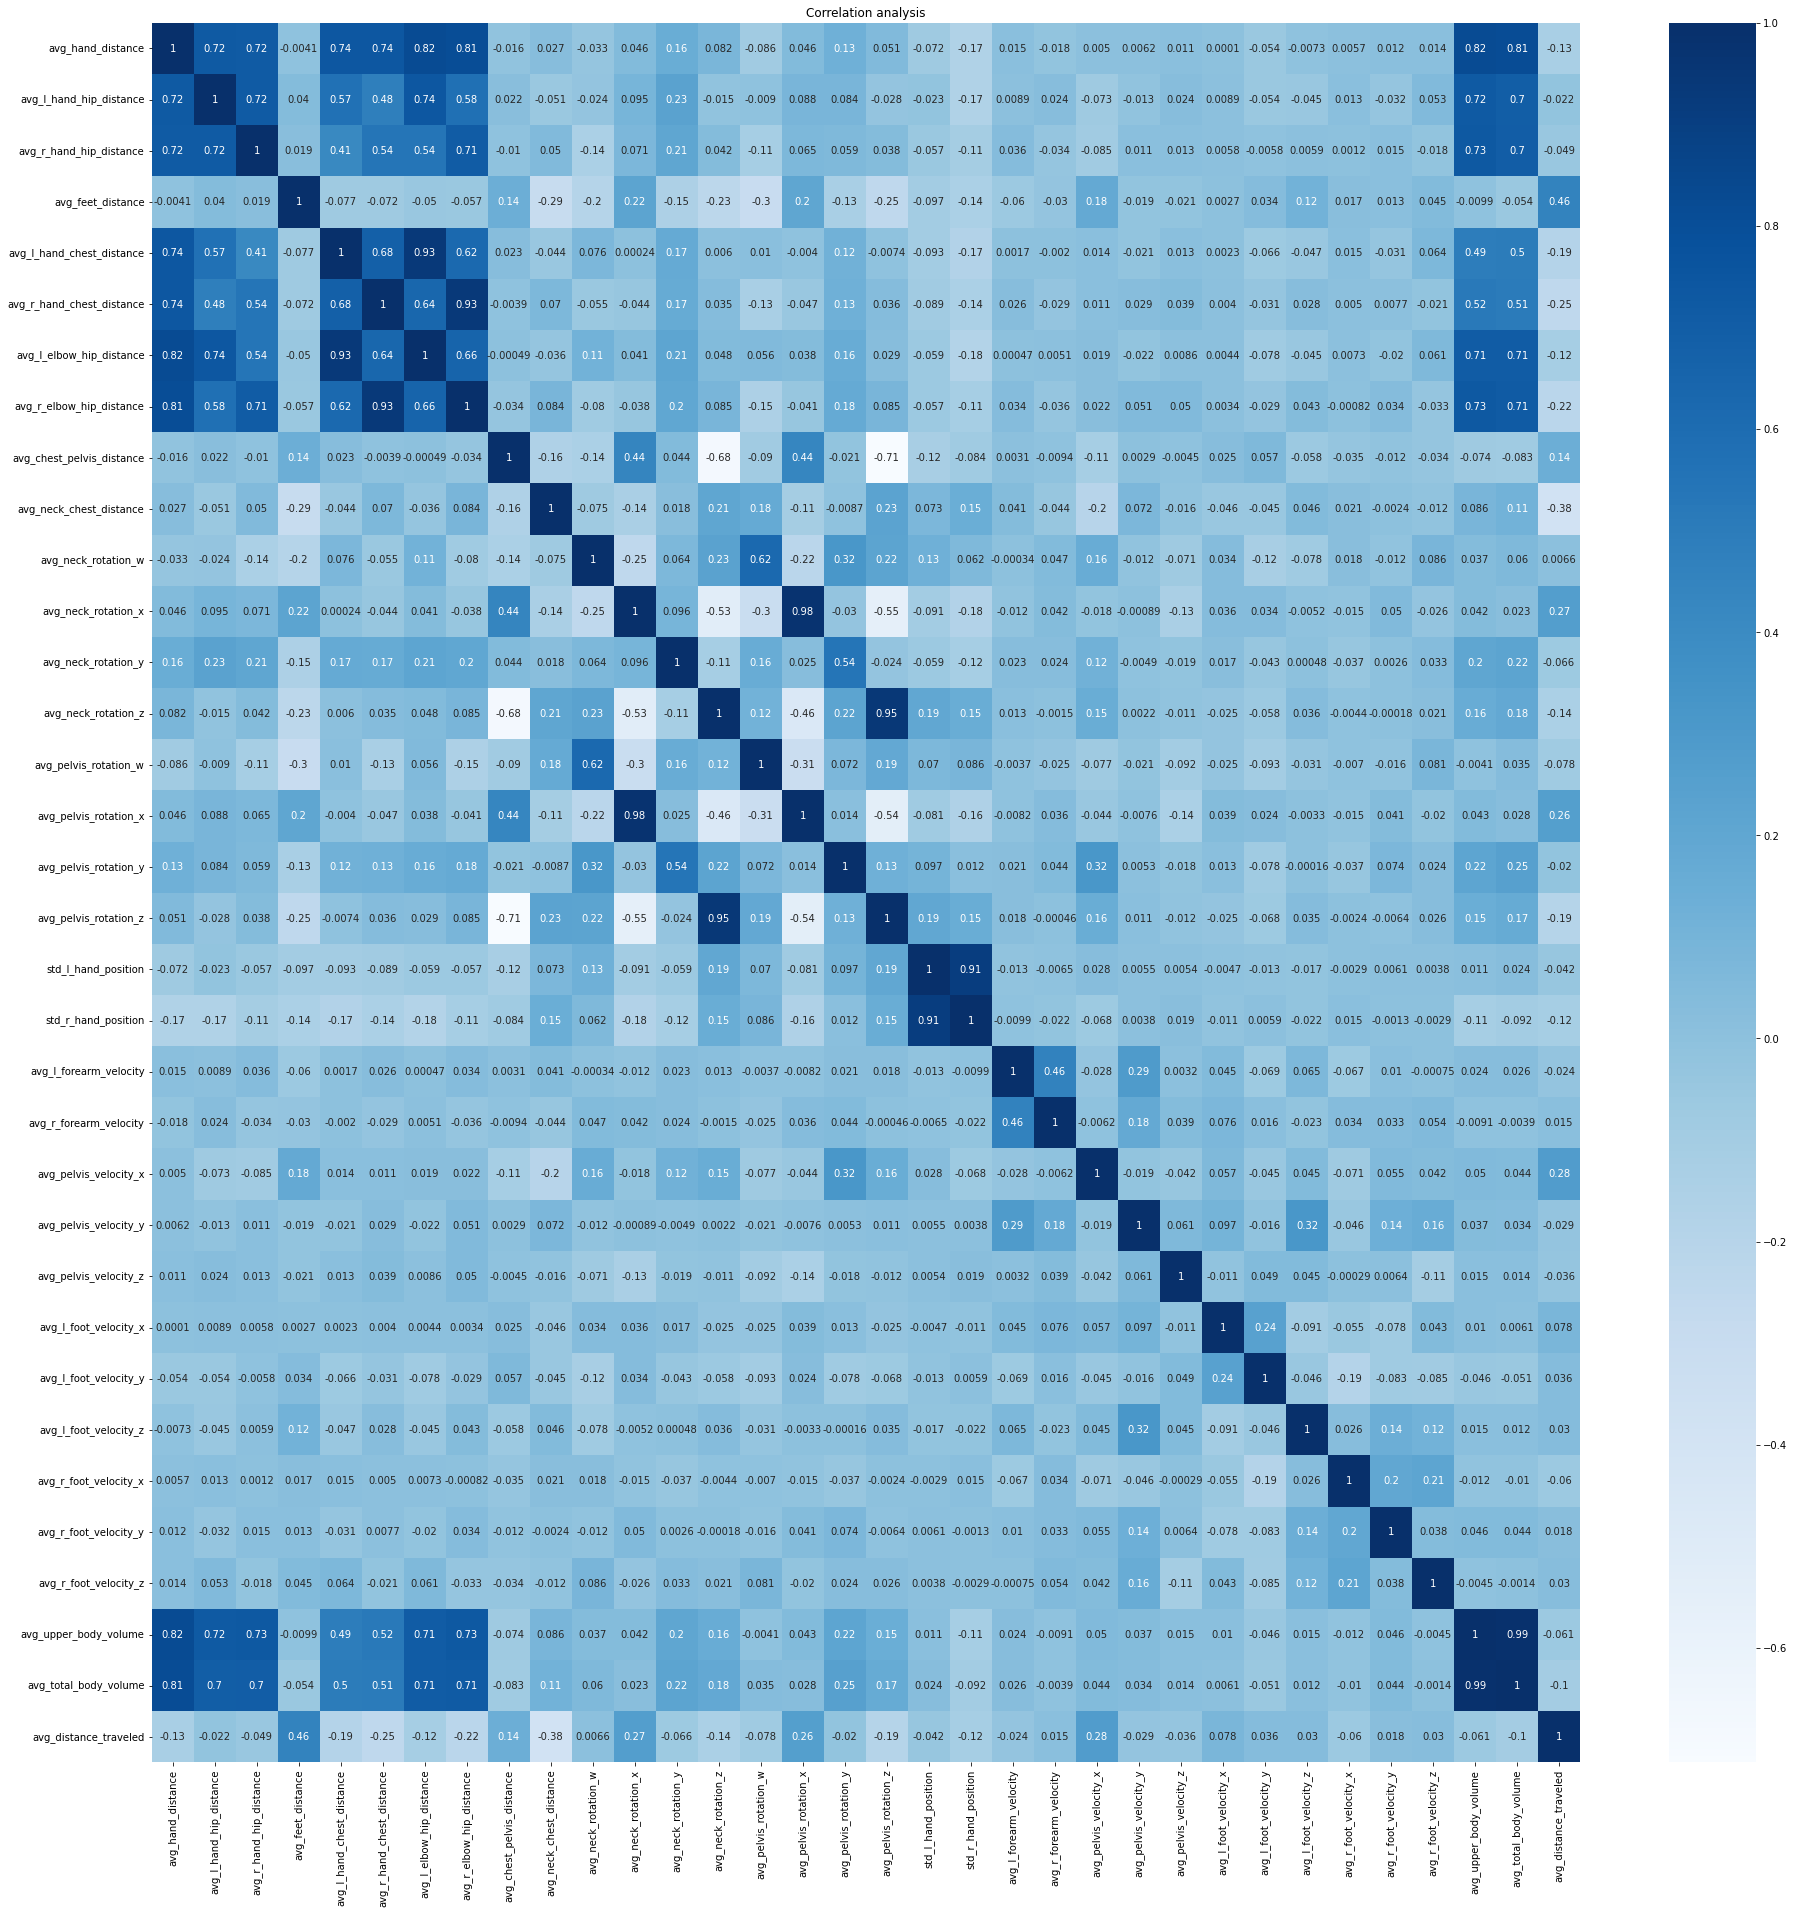

In [169]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [170]:
df = pd.DataFrame(data)
df['EMOTION'] =df['EMOTION'].astype('category').cat.codes

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION"])
print(cor_target)

avg_hand_distance            0.101788
avg_l_hand_hip_distance      0.047035
avg_r_hand_hip_distance      0.061149
avg_feet_distance            0.030914
avg_l_hand_chest_distance    0.109583
avg_r_hand_chest_distance    0.103006
avg_l_elbow_hip_distance     0.086338
avg_r_elbow_hip_distance     0.092245
avg_chest_pelvis_distance    0.079390
avg_neck_chest_distance      0.147195
avg_neck_rotation_w          0.076861
avg_neck_rotation_x          0.060887
avg_neck_rotation_y          0.132529
avg_neck_rotation_z          0.142090
avg_pelvis_rotation_w        0.054360
avg_pelvis_rotation_x        0.026924
avg_pelvis_rotation_y        0.136683
avg_pelvis_rotation_z        0.135790
std_l_hand_position          0.080890
std_r_hand_position          0.149134
avg_l_forearm_velocity       0.000102
avg_r_forearm_velocity       0.002112
avg_pelvis_velocity_x        0.193201
avg_pelvis_velocity_y        0.007182
avg_pelvis_velocity_z        0.000310
avg_l_foot_velocity_x        0.015622
avg_l_foot_v

# Data Profiling - Balanced Normalized Dataset

## Load Data from CSV

In [172]:
data = pd.read_csv('datasets/BN_LMA_DATA.csv')

In [173]:
data.head()

,avg_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,avg_feet_distance,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,avg_l_foot_velocity_x,avg_l_foot_velocity_y,avg_l_foot_velocity_z,avg_r_foot_velocity_x,avg_r_foot_velocity_y,avg_r_foot_velocity_z,avg_upper_body_volume,avg_total_body_volume,avg_distance_traveled,EMOTION
0,0.980730,0.828346,0.818457,0.181177,0.956531,0.944587,0.944043,0.932497,0.320856,0.998260,...,0.583226,0.421994,0.486220,0.630330,0.420508,0.458319,0.972471,0.979735,0.001726,afraid
1,0.980658,0.828219,0.818718,0.181577,0.956411,0.944738,0.943883,0.932679,0.321584,0.998455,...,0.583226,0.422003,0.486216,0.630004,0.420373,0.458242,0.972450,0.979554,0.001375,afraid
2,0.958989,0.769690,0.789661,0.286839,0.919515,0.934874,0.896142,0.923311,0.321468,0.996480,...,0.583249,0.421679,0.486362,0.630384,0.420388,0.458176,0.948332,0.954725,0.000992,afraid
3,0.979853,0.825206,0.817478,0.181525,0.954879,0.944070,0.941941,0.931875,0.321196,0.998538,...,0.583183,0.421898,0.486383,0.630282,0.420978,0.458476,0.971468,0.978532,0.000988,afraid
4,0.959227,0.769592,0.790414,0.286788,0.919852,0.934975,0.896600,0.923366,0.321328,0.995639,...,0.583269,0.421394,0.486172,0.630666,0.419911,0.457917,0.948381,0.954898,0.001547,afraid


## Data Analysis

### Data Shape

In [174]:
no_entries = data.shape[0]
no_variables = data.shape[1]

no_variables = no_variables - 1 # Remove the target variable to get the ratio

entries2variables_ration = no_entries/no_variables

print('No. entries:', no_entries, '\nNo. Features:', no_variables)
print('Entries to Feature Ratio:', entries2variables_ration)

No. entries: 22000 
No. Features: 34
Entries to Feature Ratio: 647.0588235294117


### Variable Types

In [175]:
print("Feature Types:\n" + str(data.dtypes))

Feature Types:
avg_hand_distance            float64
avg_l_hand_hip_distance      float64
avg_r_hand_hip_distance      float64
avg_feet_distance            float64
avg_l_hand_chest_distance    float64
avg_r_hand_chest_distance    float64
avg_l_elbow_hip_distance     float64
avg_r_elbow_hip_distance     float64
avg_chest_pelvis_distance    float64
avg_neck_chest_distance      float64
avg_neck_rotation_w          float64
avg_neck_rotation_x          float64
avg_neck_rotation_y          float64
avg_neck_rotation_z          float64
avg_pelvis_rotation_w        float64
avg_pelvis_rotation_x        float64
avg_pelvis_rotation_y        float64
avg_pelvis_rotation_z        float64
std_l_hand_position          float64
std_r_hand_position          float64
avg_l_forearm_velocity       float64
avg_r_forearm_velocity       float64
avg_pelvis_velocity_x        float64
avg_pelvis_velocity_y        float64
avg_pelvis_velocity_z        float64
avg_l_foot_velocity_x        float64
avg_l_foot_velocity_y  

afraid       2000
angry        2000
bored        2000
disgusted    2000
excited      2000
happy        2000
neutral      2000
pleased      2000
relaxed      2000
sad          2000
tired        2000
Name: EMOTION, dtype: int64


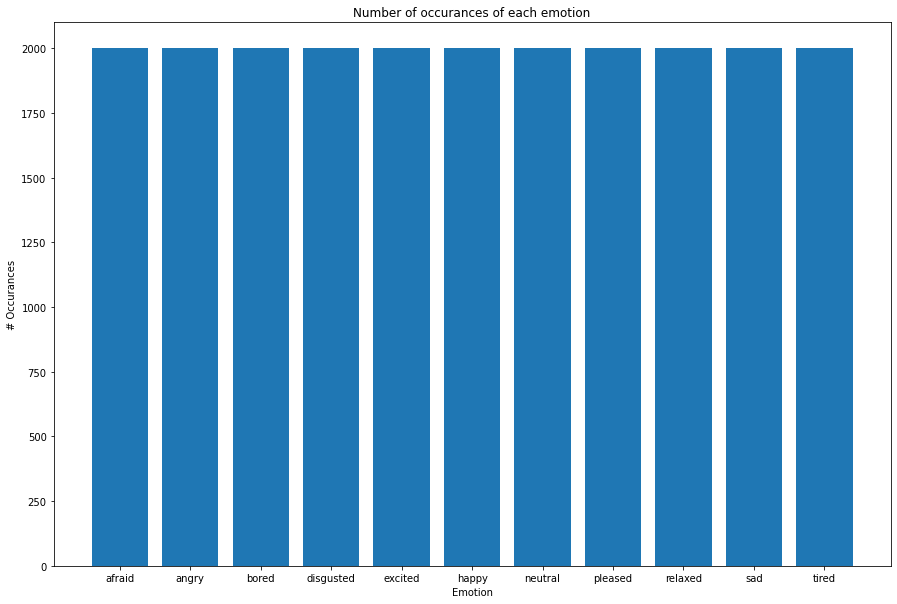

In [176]:
print(data['EMOTION'].value_counts())

fig, ax = plt.subplots(figsize=(15,10))

ax.bar(data['EMOTION'].unique(), data['EMOTION'].value_counts())
ax.set(xlabel='Emotion', ylabel='# Occurances',
       title='Number of occurances of each emotion')

plt.show()

### Granularity

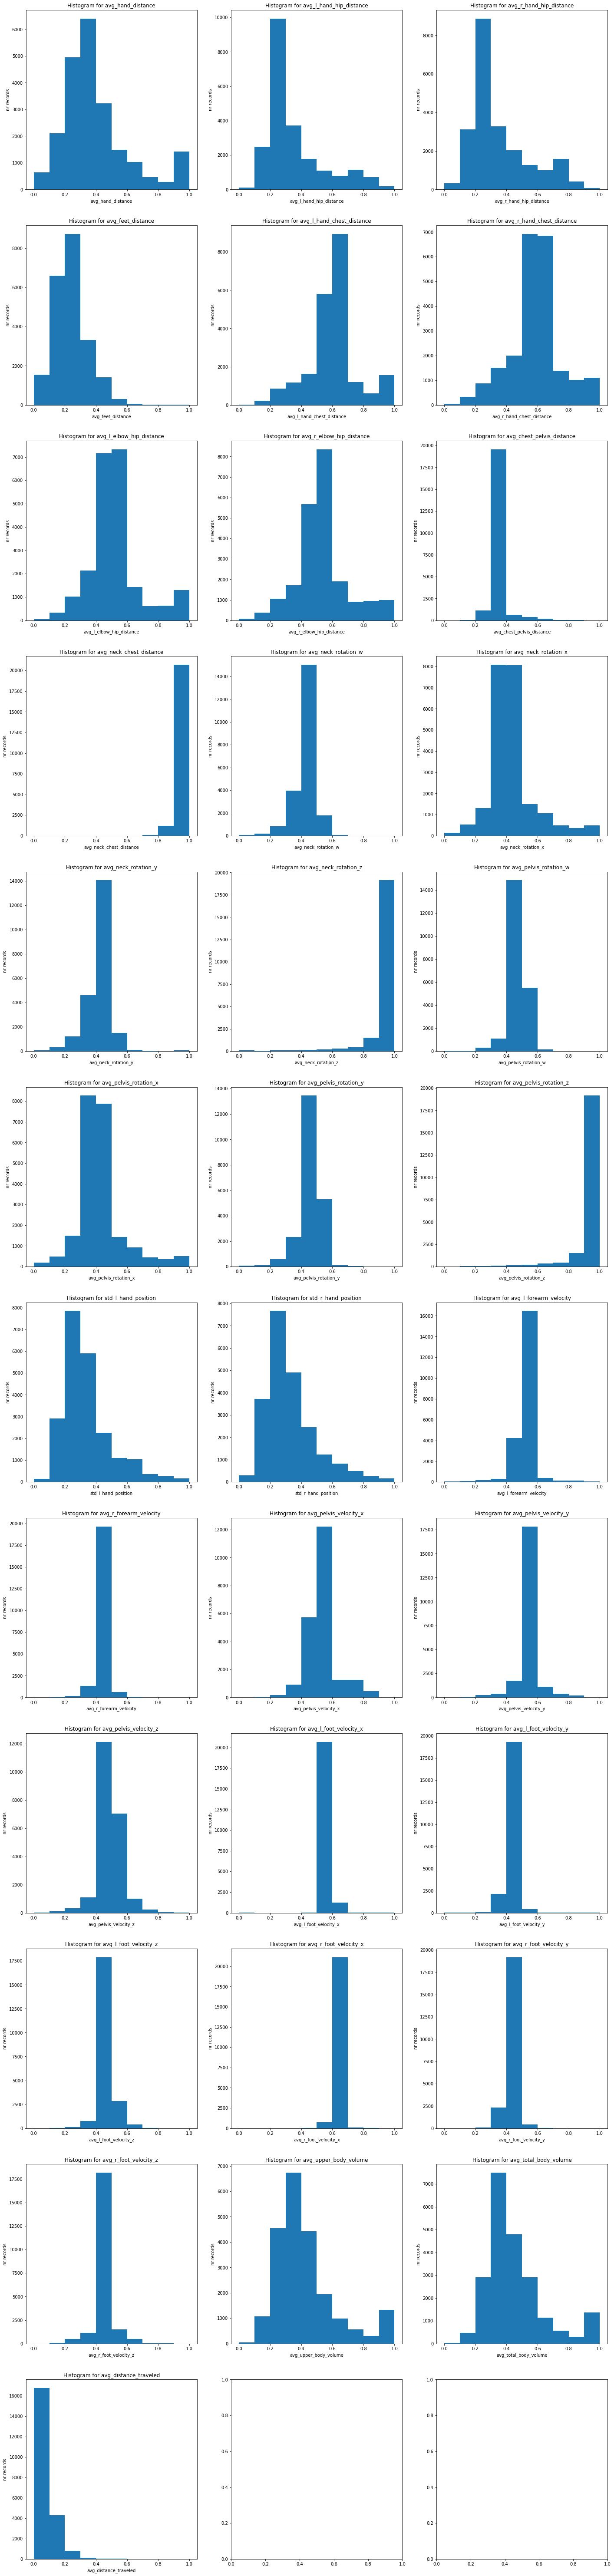

In [177]:
variables = data.select_dtypes(include='number').columns
rows = 12
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0
for n in range(len(variables)):
    axs[i, j].set_title('Histogram for %s'%variables[n])
    axs[i, j].set_xlabel(variables[n])
    axs[i, j].set_ylabel('nr records')
    axs[i, j].hist(data[variables[n]].values)

    i, j = (i + 1, 0) if (n+1) % cols == 0 else (i, j + 1)
    
plt.show()

### Correlation Analysis

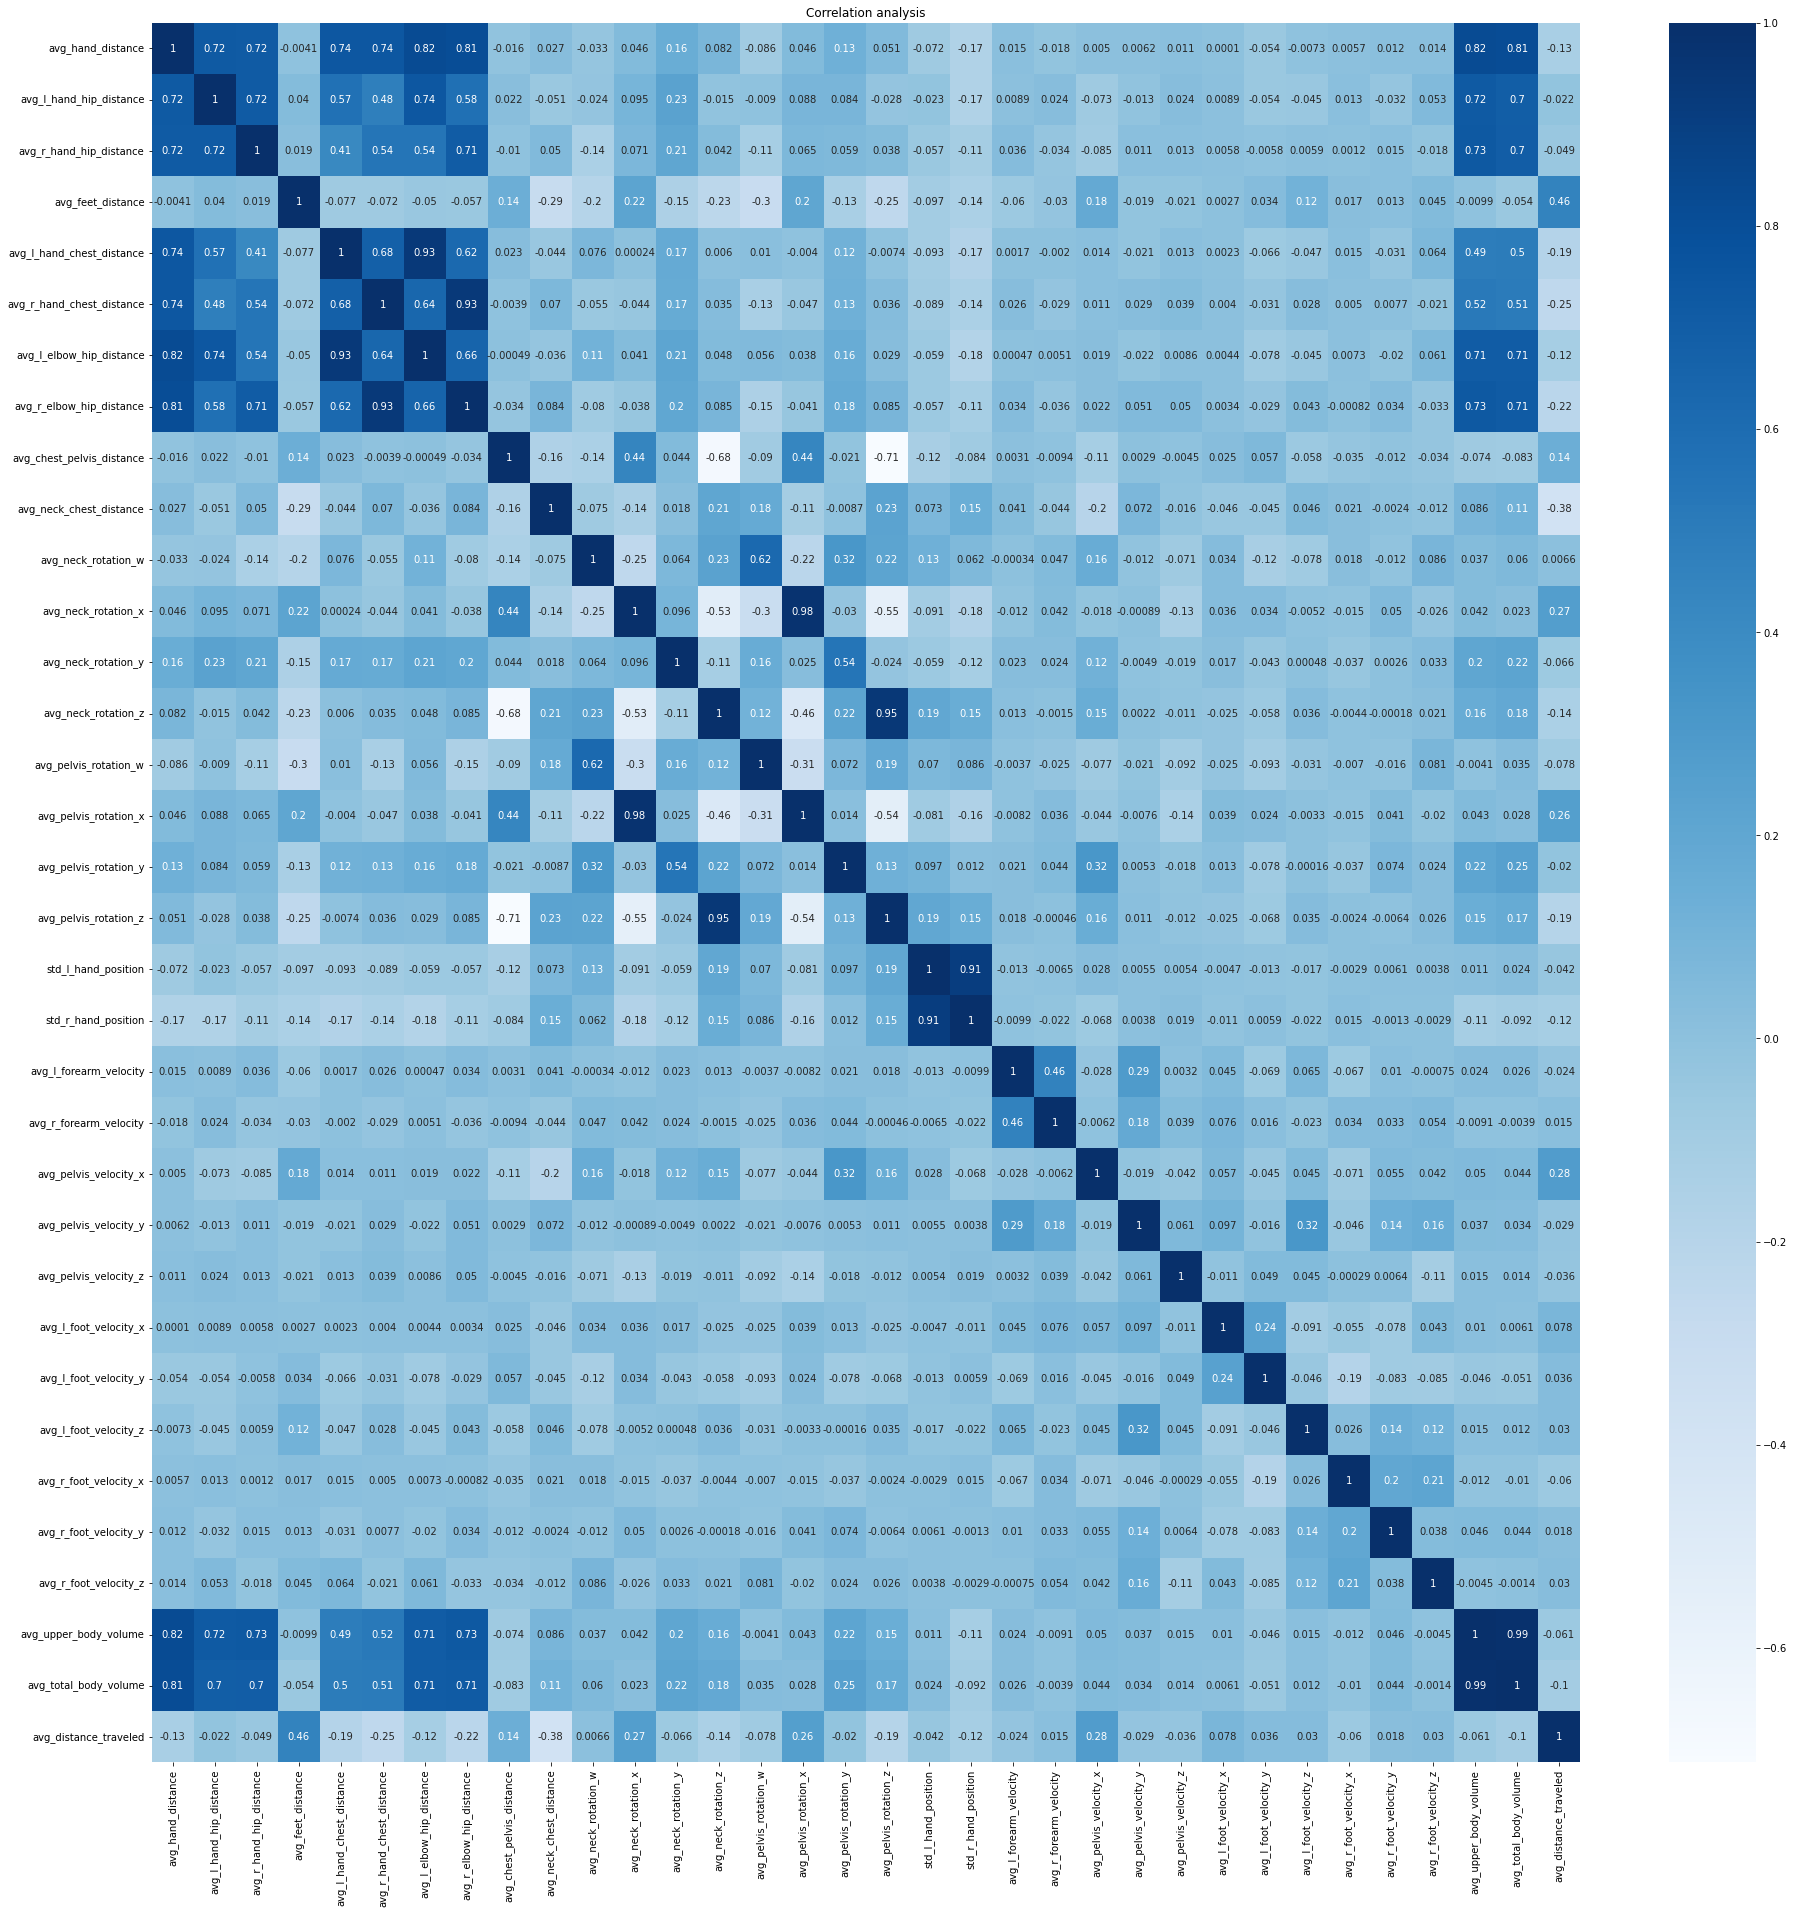

In [169]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [170]:
df = pd.DataFrame(data)
df['EMOTION'] =df['EMOTION'].astype('category').cat.codes

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION"])
print(cor_target)

avg_hand_distance            0.101788
avg_l_hand_hip_distance      0.047035
avg_r_hand_hip_distance      0.061149
avg_feet_distance            0.030914
avg_l_hand_chest_distance    0.109583
avg_r_hand_chest_distance    0.103006
avg_l_elbow_hip_distance     0.086338
avg_r_elbow_hip_distance     0.092245
avg_chest_pelvis_distance    0.079390
avg_neck_chest_distance      0.147195
avg_neck_rotation_w          0.076861
avg_neck_rotation_x          0.060887
avg_neck_rotation_y          0.132529
avg_neck_rotation_z          0.142090
avg_pelvis_rotation_w        0.054360
avg_pelvis_rotation_x        0.026924
avg_pelvis_rotation_y        0.136683
avg_pelvis_rotation_z        0.135790
std_l_hand_position          0.080890
std_r_hand_position          0.149134
avg_l_forearm_velocity       0.000102
avg_r_forearm_velocity       0.002112
avg_pelvis_velocity_x        0.193201
avg_pelvis_velocity_y        0.007182
avg_pelvis_velocity_z        0.000310
avg_l_foot_velocity_x        0.015622
avg_l_foot_v